In [1]:
import numpy as np
from scipy.integrate import quad

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsmath}',
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica']
})

In [84]:
def trap_quad(f,a,b,N=10):
    x_i = np.linspace(a,b,N+1)
    h   = (b-a)/N
    w_i = h/2*np.array([1]+(N-1)*[2]+[1])
    f_i = f(x_i)
    return np.sum(w_i*f_i)

def rom_quad(f,a,b,N=10,R=2):
    I1  = trap_quad(f,a,b,N)
    IR  = trap_quad(f,a,b,R*N)
    err = 1/(R**2 - 1)*(IR - I1)
    return IR+err

def gauss_quad(f,a,b,n=10):
    u_i,w_i = np.polynomial.legendre.leggauss(n)
    x_i = (b-a)*u_i/2 + (a+b)/2
    f_i = f(x_i)
    Jac = (b-a)/2
    return np.sum(Jac*w_i*f_i)

# Problem 1

In [85]:
sets = {
    1: [lambda t: t**3,[0,1],0.25],
    2: [lambda t: np.exp(t),[0,1],np.e-1],
    3: [lambda t: np.sin(t),[0,np.pi],2]
}

In [86]:
N = 10*np.arange(1,11)
results = {1:{},2:{},3:{}}
for i in sets:
    f,ab,exact = sets[i]
    results[i]['trap']    = np.array([trap_quad(f,*ab,_) for _ in N])
    results[i]['rom']     = np.array([rom_quad(f,*ab,int(_/2),2) for _ in N])
    results[i]['gauss']   = gauss_quad(f,*ab)
    results[i]['scipy_v'] = quad(f,*ab)[0]
    results[i]['scipy_e'] = quad(f,*ab)[1]
    results[i]['exact']   = exact
    

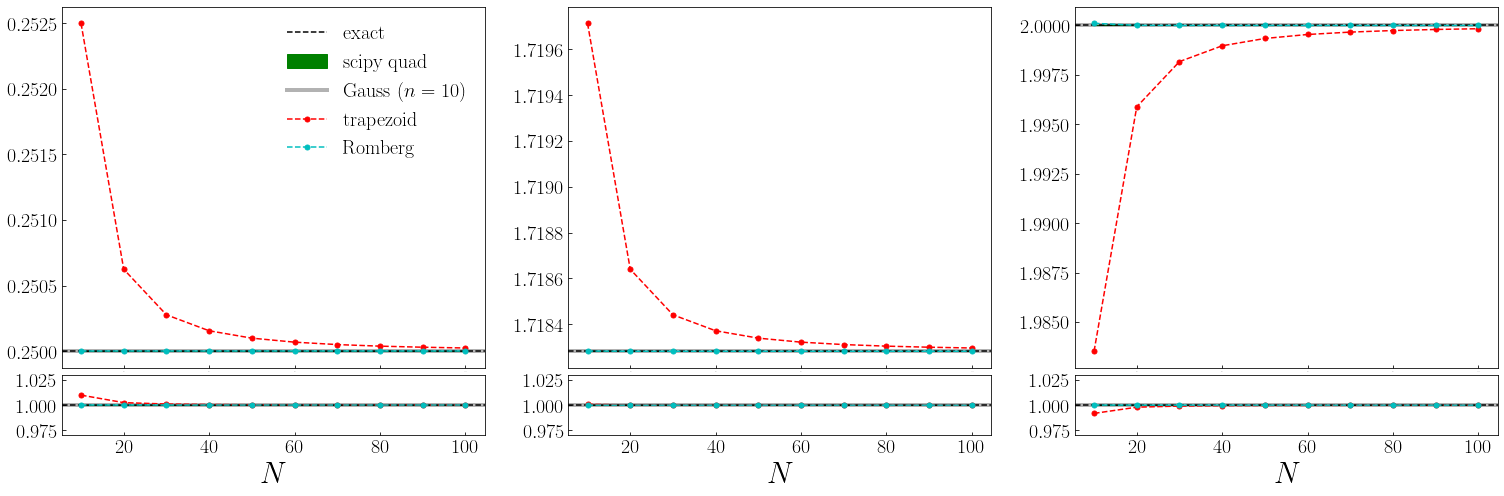

In [97]:
nrows,ncols = 2,3
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*ncols,7),gridspec_kw={'height_ratios': [6,1]})

for i in results:
    ax[0][i-1].axhline(y=results[i]['exact'],color='k',ls='--',label=r'$\rm exact$')
    ax[0][i-1].fill_between(N,results[i]['scipy_v']+results[i]['scipy_e'],results[i]['scipy_v']-results[i]['scipy_e'],color='g',label=r'$\rm scipy~quad$')
    ax[0][i-1].axhline(y=results[i]['gauss'],color='k',alpha=0.3,lw=4,label=r'${\rm Gauss}~(n=10)$')
    ax[0][i-1].plot(N,results[i]['trap'],color='r',ls='--',marker='.',markersize=10,label=r'$\rm trapezoid$')
    ax[0][i-1].plot(N,results[i]['rom'],color='c',ls='--',marker='.',markersize=10,label=r'$\rm Romberg$')
    
    ax[1][i-1].axhline(y=1,color='k',ls='--',label=r'$\rm exact$')
    ax[1][i-1].fill_between(N,(results[i]['scipy_v']+results[i]['scipy_e'])/results[i]['exact'],(results[i]['scipy_v']-results[i]['scipy_e'])/results[i]['exact'],color='g')
    ax[1][i-1].axhline(y=results[i]['gauss']/results[i]['exact'],color='k',alpha=0.3,lw=4)
    ax[1][i-1].plot(N,results[i]['trap']/results[i]['exact'],color='r',ls='--',marker='.',markersize=10)
    ax[1][i-1].plot(N,results[i]['rom']/results[i]['exact'],color='c',ls='--',marker='.',markersize=10)
    
    ax[1][i-1].set_xlabel(r'$N$',size=30)
    ax[1][i-1].set_ylim(0.97,1.03)
    for j in range(2):
        ax[j][i-1].tick_params(axis='both',which='major',direction='in',labelsize=20)
    ax[0][i-1].tick_params(axis='x',which='major',direction='in',labelsize=0)

ax[0][0].legend(fontsize=20,loc='upper right',frameon=False)    

fig.tight_layout(h_pad=0,w_pad=2)
plt.show()
# fig.savefig(r'prob1.pdf',bbox_inches='tight')

# Problem 2

In [100]:
sets = {
    1: [lambda t: 1/(1-0.998*t**2),[0,1]],
    2: [lambda t: t*np.sin(30*t)*np.cos(50*t),[0,2*np.pi]],
    3: [lambda t: t/(np.exp(t) - 1),[0,1]],
    4: [lambda t: t*np.sin(1/t),[0,1]]
}

In [103]:
N = 100
results = {}
for i in sets:
    f,ab = sets[i]
    results[i] = {}
    results[i]['trap']  = trap_quad(f,*ab,N=N)
    results[i]['rom']   = rom_quad(f,*ab,N=int(N/2))
    results[i]['gauss'] = gauss_quad(f,*ab)
    results[i]['scipy'] = quad(f,*ab)

/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_65853/4220751577.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  results[i]['scipy'] = quad(f,*ab)
/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_65853/3396054777.py:4: RuntimeWarning: invalid value encountered in true_divide
  3: [lambda t: t/(np.exp(t) - 1),[0,1]],
/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_65853/3396054777.py:5: RuntimeWarning: divide by zero encountered in true_divide
  4: [lambda t: t*np.sin(1/t),[0,1]]
/var/folders/_b/29vq0z955j77svdys97cr5p40000gn/T/ipykernel_65853/33

In [104]:
results

{1: {'trap': 5.362792610474358,
  'rom': 4.633139993416674,
  'gauss': 3.1754328415840654,
  'scipy': (3.8037565146509946, 1.2978109417894528e-09)},
 2: {'trap': 0.27168690119723077,
  'rom': 0.31949148341043526,
  'gauss': 3.30336933056279,
  'scipy': (0.1178097245096171, 7.06627363204228e-07)},
 3: {'trap': nan,
  'rom': nan,
  'gauss': 0.777504634112248,
  'scipy': (0.7775046341122483, 8.63203546544176e-15)},
 4: {'trap': nan,
  'rom': nan,
  'gauss': 0.38705586893341254,
  'scipy': (0.37852612368669714, 7.057603282345504e-07)}}

# Problem 3

In [131]:
def gauss_quad_improper(f,a,b,n=10):
    f_ = lambda t: f(np.tan(t))/np.cos(t)**2
    if b == np.inf:
        return gauss_quad(f_,0,np.pi/2,n)

In [132]:
funcs = [
    lambda t: np.exp(-t**2)/(1+t**2),
    lambda t: t*np.sin(t)/(1 + t**2),
    lambda t: np.exp(-np.sqrt(t))*np.cos(2*t)
]

for f in funcs:
    print(gauss_quad_improper(f,0,np.inf,n=10))

0.6716176690224877
-2.117564294749184
0.4109210598439598


In [ ]:
0.6716467108233677
0.5778636748954609
0.1229709152892961